In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import sin, cos, tan, atan, cosh, sinh, tanh, abs, linspace, min, max, argmin, argmax, pi, mean

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from main import *

import main

plt.rcParams.update({
    'figure.facecolor': '#121212',
    'figure.figsize': (12, 6),
    'axes.facecolor': '#1e1e1e',
    # 'axes.edgecolor': '#4a90e2',
    'lines.linewidth': 1,
    # 'lines.color': '#4a90e2',
    'text.color': '#cccccc',
    'axes.labelcolor': '#cccccc',
    'xtick.color': '#bbbbbb',
    'ytick.color': '#bbbbbb',
    # 'axes.titlecolor': '#4a90e2',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'grid.color': '#333f58',
    'grid.linestyle': '--',
    'grid.linewidth': 0.7,
    'axes.grid': True,
    'legend.facecolor': '#2c2c2c',
    # 'legend.edgecolor': '#4a90e2',
    'legend.fontsize': 12,
    'legend.fancybox': True,
    'savefig.facecolor': '#121212',
    'savefig.edgecolor': '#121212',
})

np.set_printoptions(
    formatter={'float_kind': lambda x: f"{x:.2e}"}
    #formatter={'float_kind': lambda x: f"{x:.2g}"},
    #suppress=False 
)



In [ ]:
import coordinate_transform



hello world!


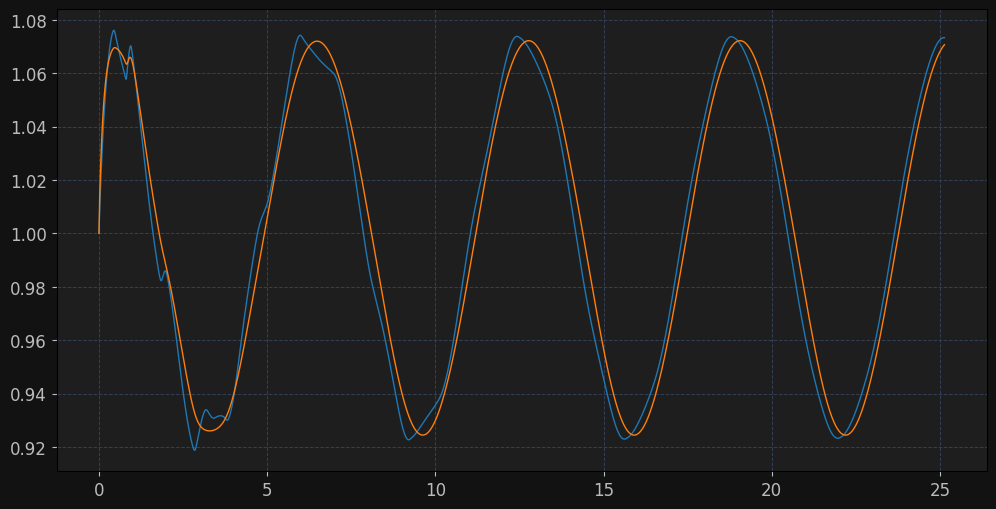

In [21]:
nx = 1000

# constants:
A = 0.84
kappa = 1.7e1
H = 12
L = 1.9e4
h0 = 0.0025
# h0 = 0.00025
omega = 1.4e-4

r = 0.24
n = 0.03
rho = 1000
g = 9.81
c_d = g * n**2


c_d = 0.4
nr_periods = 4

friction_parameter = c_d
update_u = update_u3

t, x_x, l_t_, D_xt_, u_xt_ = solve_pde(A, kappa, H, friction_parameter, h0, nx, nr_periods, update_u)

plt.plot(t, l_t_)

friction_parameter = 0.4
update_u = update_u1
t, x_x, l_t_, D_xt_, u_xt_ = solve_pde(A, kappa, H, friction_parameter, h0, nx, nr_periods, update_u)
plt.plot(t, l_t_)

plt.show()

In [ ]:

def visualize(t, x_x, l_t_, D_xt_, u_xt_):

    # extract one period
    t1_idx = np.argmin(np.abs(t - 3 * (2*np.pi)))
    t2_idx = np.argmin(np.abs(t - 4 * (2*np.pi)))


    h_x = np.outer(x_x, l_t_)

    D_xt_per = D_xt_[:, t1_idx:t2_idx]
    u_xt_per = u_xt_[:, t1_idx:t2_idx]
    l_t_per = l_t_[t1_idx:t2_idx]
    t_per = t[t1_idx:t2_idx]
    h_x_per = h_x[:, t1_idx:t2_idx]

    dz = h_x_per + D_xt_per

    n_moments = 10
    sample_idx = np.round(linspace(0, len(t_per) - 1, n_moments)).astype(int)


    fig, axs = plt.subplots(5, 3, figsize=(20, 20))




    axs[0, 0].plot(x_x, mean(u_xt_per, 1))
    axs[0, 0].set_title('Mean vel in space')
    axs[0, 1].plot(x_x, max(u_xt_per, 1), 'tab:orange')
    axs[0, 1].set_title('Max vel in space')
    axs[0, 2].plot(x_x, min(u_xt_per, 1), 'tab:green')
    axs[0, 2].set_title('Min vel in space')

    axs[1, 0].plot(x_x, mean(dz, 1))
    axs[1, 0].set_title('Mean wl in space')
    axs[1, 1].plot(x_x, max(dz, 1), 'tab:orange')
    axs[1, 1].set_title('Max wl in space')
    axs[1, 2].plot(x_x, min(dz, 1), 'tab:green')
    axs[1, 2].set_title('Min wl in space')

    axs[2, 0].plot(x_x, dz[:, sample_idx[:n_moments//2]])
    axs[2, 1].plot(x_x, dz[:, sample_idx[n_moments//2:]])




    axs[4, 0].plot(t_per, l_t_per)
    axs[4, 0].set_title('Length in time')




    # for ax in axs.flat:
    #     ax.set(xlabel='x-label', ylabel='y-label')

    # plt.savefig("test.png")
    plt.show()

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    # for ax in axs.flat:
    #     ax.label_outer()


 

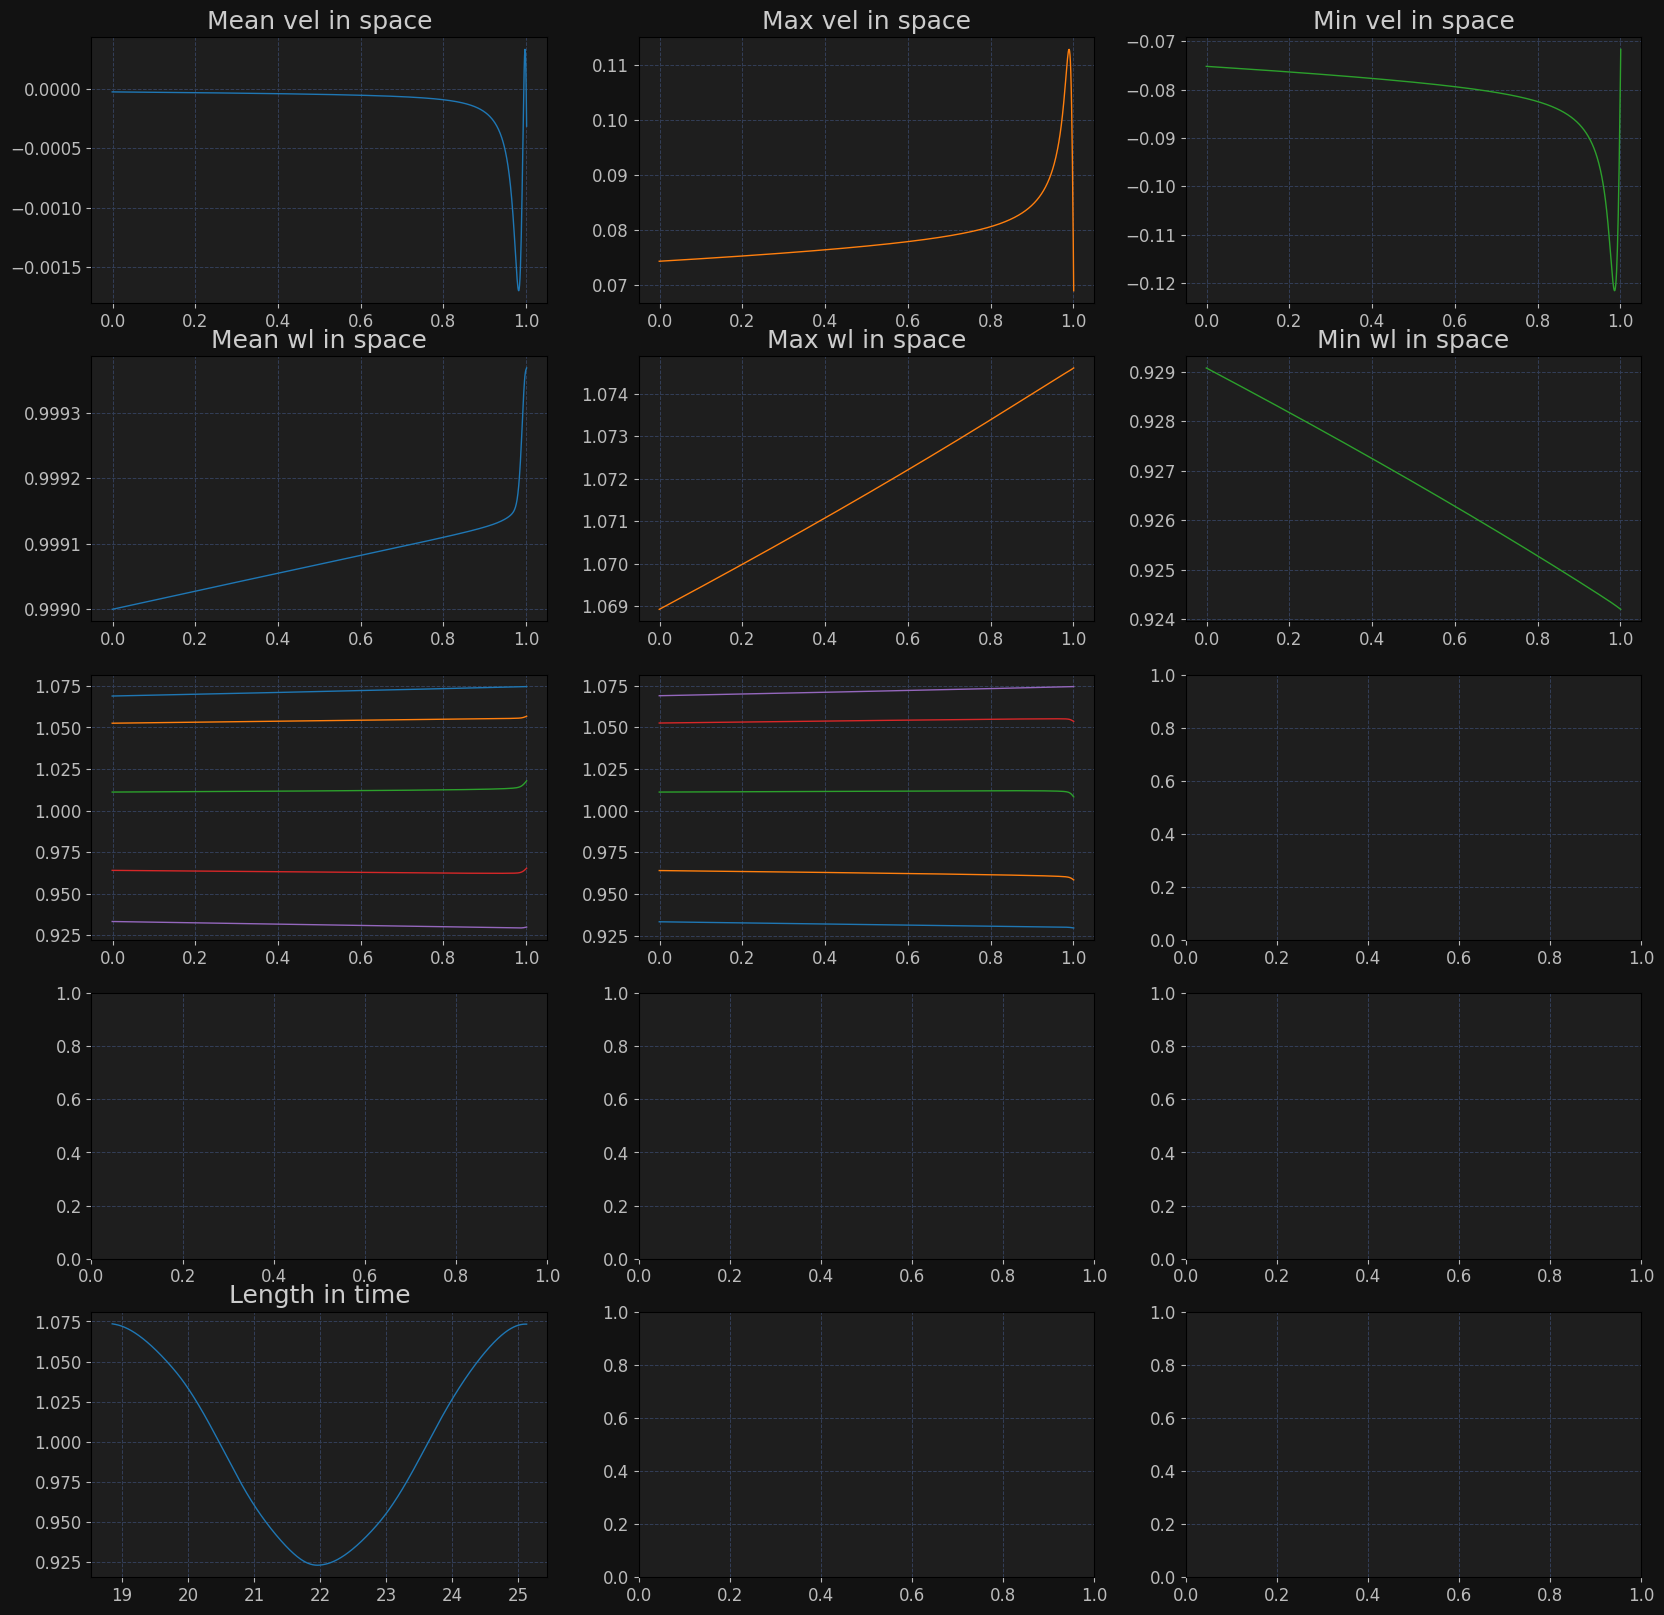

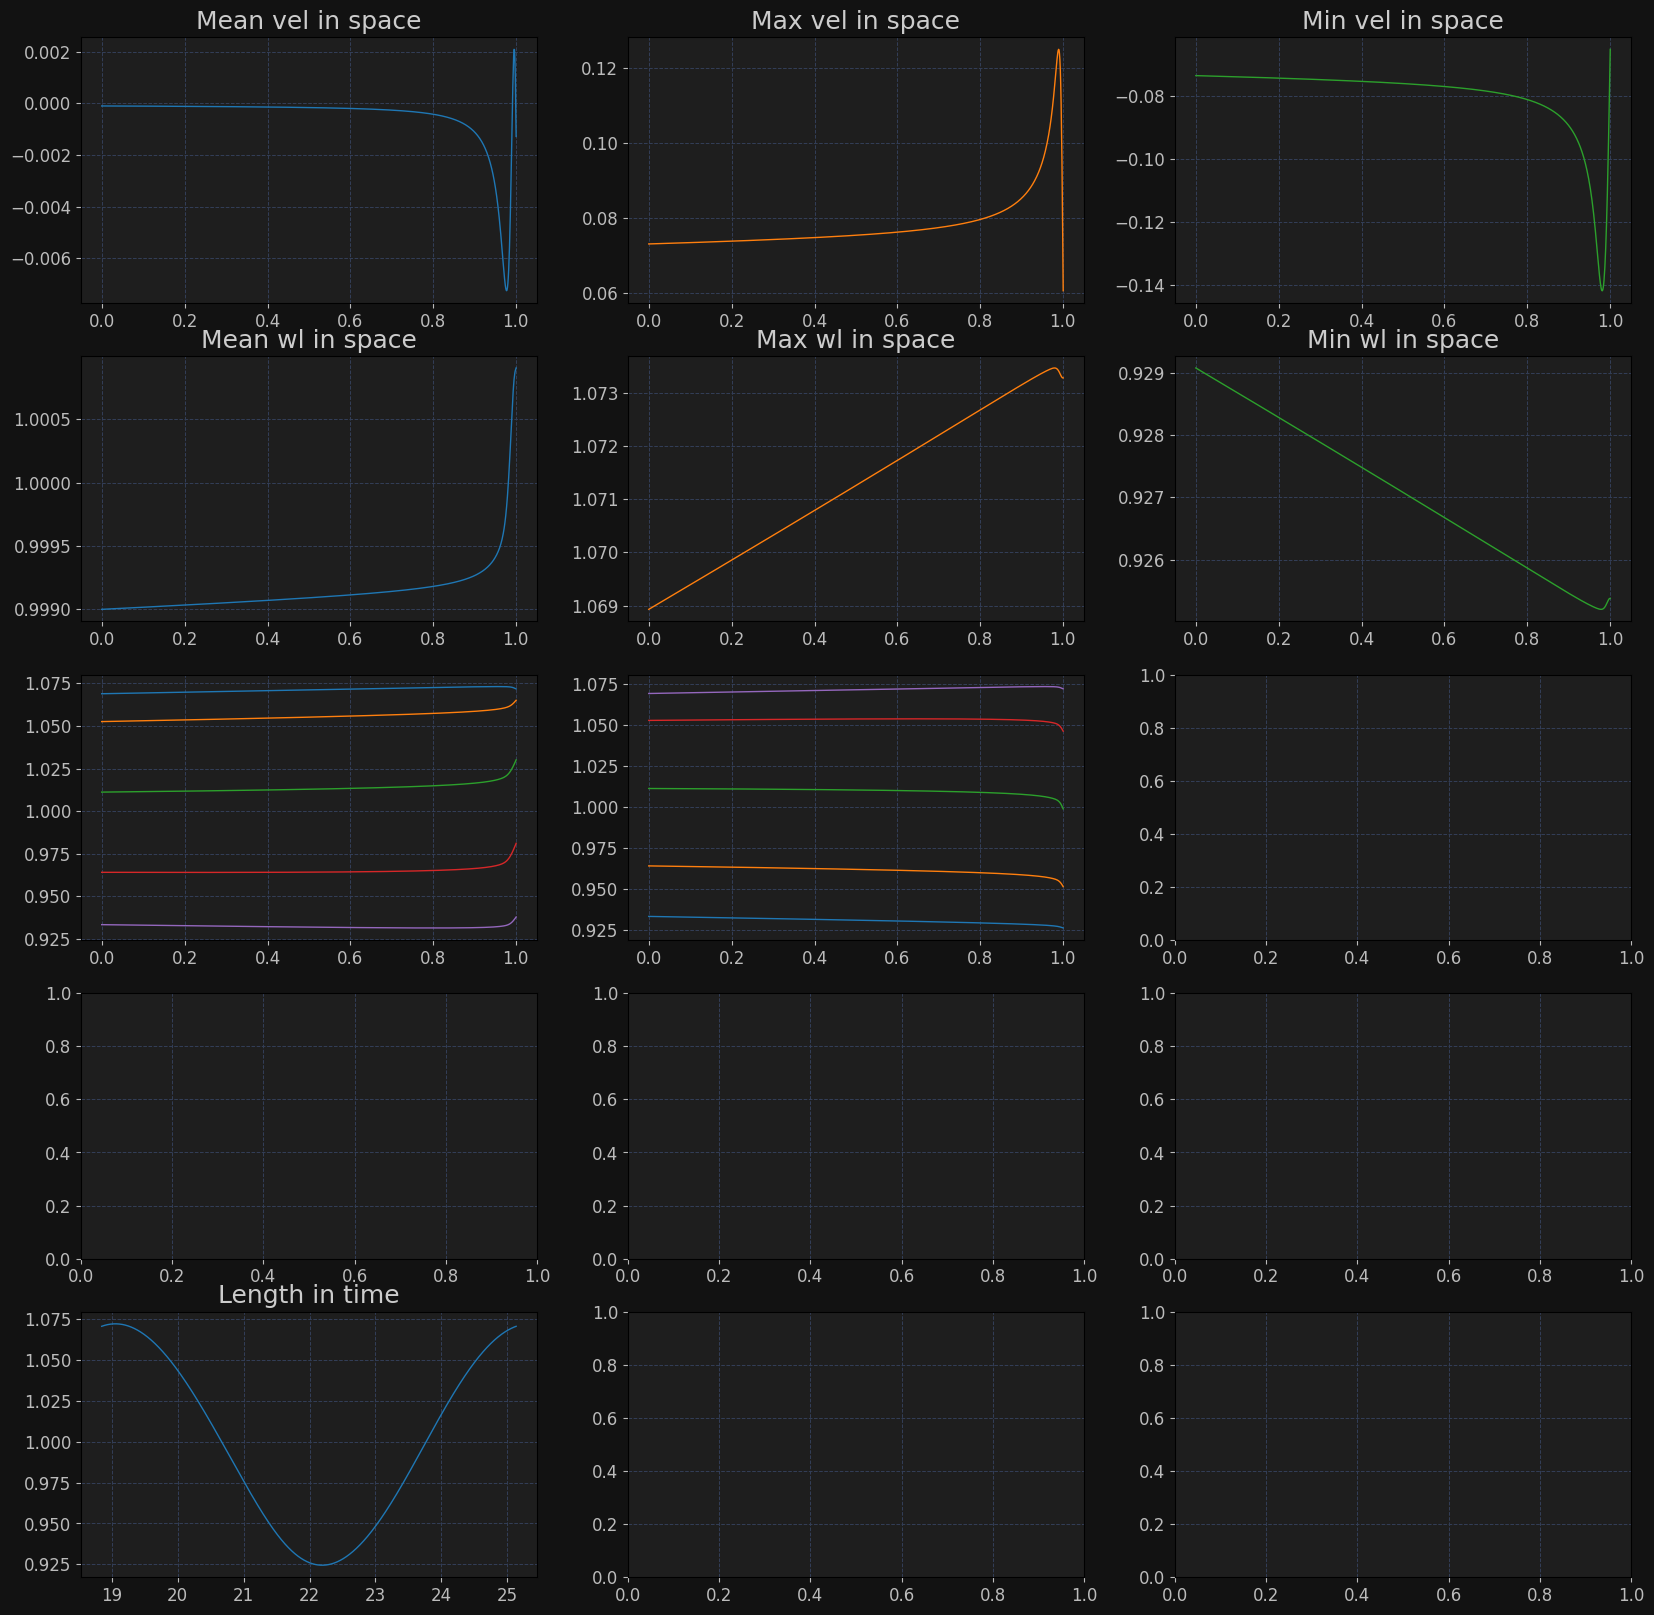

In [ ]:
friction_parameter = 0.4
update_u = update_u3
t, x_x, l_t_, D_xt_, u_xt_ = solve_pde(A, kappa, H, friction_parameter, h0, nx, nr_periods, update_u)
visualize(t, x_x, l_t_, D_xt_, u_xt_)

friction_parameter = 0.4
update_u = update_u1
t, x_x, l_t_, D_xt_, u_xt_ = solve_pde(A, kappa, H, friction_parameter, h0, nx, nr_periods, update_u)
# plt.plot(t, l_t_)

visualize(t, x_x, l_t_, D_xt_, u_xt_)


[np.int64(50373), np.int64(56130), np.int64(61887), np.int64(67644), np.int64(73401), np.int64(79158)]


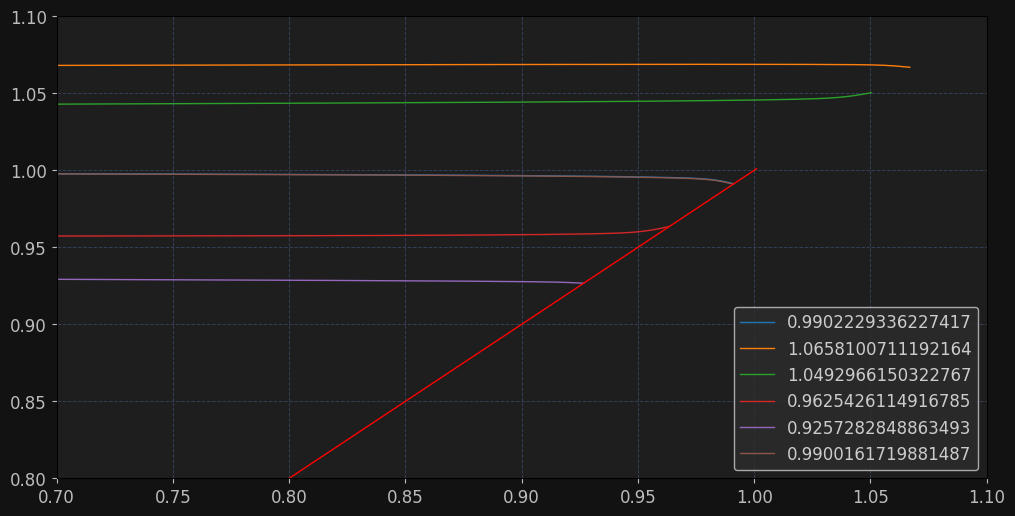

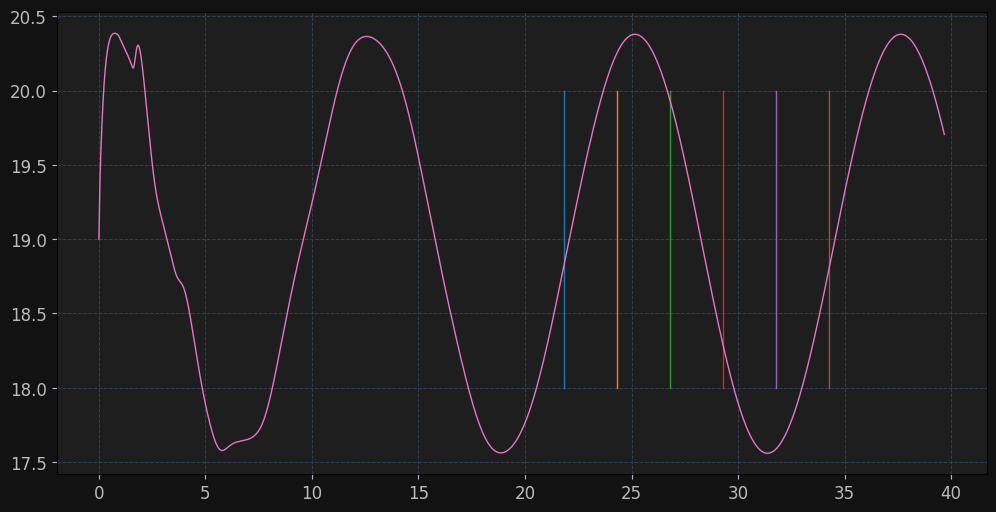

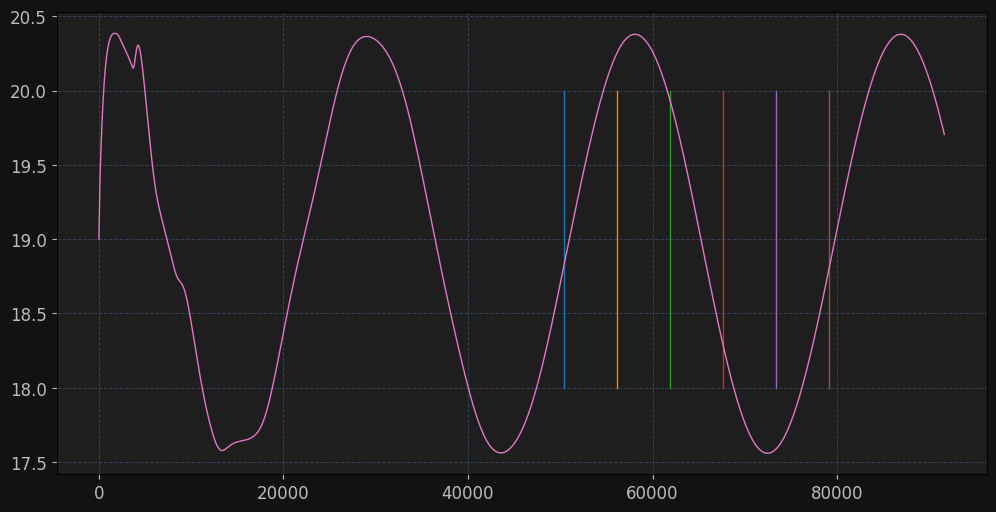

In [ ]:

target_times = np.array([1/5, 2/5, 3/5, 4/5, 5/5, 6/5]) + 1.55
target_time_idxs = [np.argmin(np.abs(t - target_time * 2 * np.pi)) for target_time in target_times]
print(target_time_idxs)

for target_time_idx in target_time_idxs:
    # D = (D_xt_[:, target_time_idx] + x_x * l_t_[target_time_idx]) /  l_t_[target_time_idx]
    D = (D_xt_[:, target_time_idx] + x_x * l_t_[target_time_idx])# /  l_t_[target_time_idx]


    plt.plot(x_x * l_t_[target_time_idx], D)

plt.plot(x_x, x_x, 'r')
plt.xlim([0.7, 1.1])
plt.ylim([0.8, 1.1])
plt.legend([str(l_t_[target_time_idx]) for target_time_idx in target_time_idxs])



# plt.plot(t[:target_time_idx] / omega / 3600, l_t_[:target_time_idx] * L / 1000)
plt.show()



T = (2*np.pi) / omega

for idx in target_time_idxs:
    plt.plot(np.array([t[idx], t[idx]]) / omega / 3600, [18, 20])

plt.plot(t / omega / 3600, l_t_ * L / 1000)

plt.show()



for idx in target_time_idxs:
    plt.plot(np.array([idx, idx]), [18, 20])
plt.plot(l_t_ * L / 1000)
plt.show()






91625
43177
9.424764613974373
9.42477796076938
57569
12.566280057944988
12.566370614359172
[1.87e+01 1.90e+01 1.93e+01 1.97e+01 2.00e+01 2.03e+01 2.06e+01 2.10e+01
 2.13e+01 2.16e+01 2.19e+01 2.23e+01 2.26e+01 2.29e+01 2.32e+01]


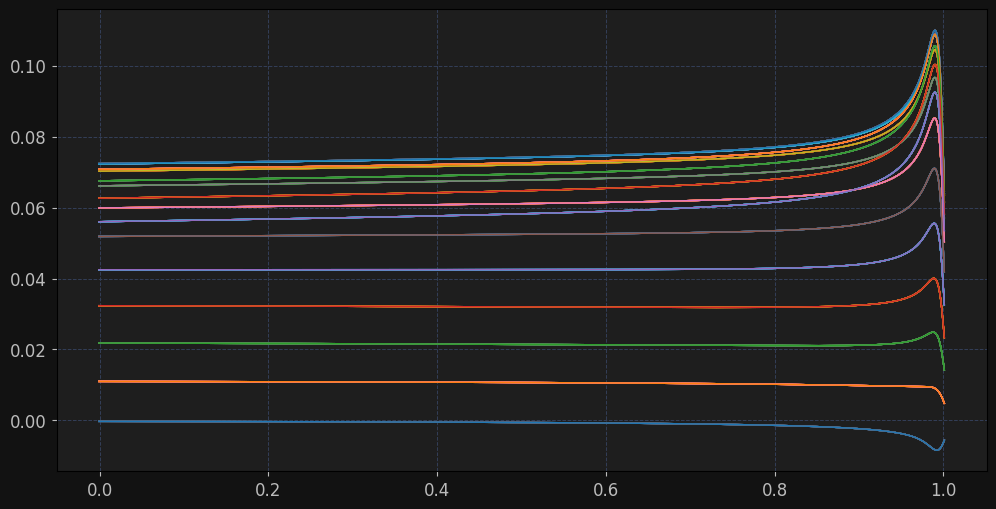

In [ ]:
print(len(t))

n = 15

t_idx_min = np.argmin(np.cos(t[40000:50000])) + 40000
print(t_idx_min)
t_min = t[t_idx_min]
print(t_min)
print(3 * np.pi)



t_idx_min2 = np.argmin(np.abs(t - 4 * np.pi))

print(t_idx_min2)
print(t[t_idx_min2])
print(4 * np.pi)



moments =  np.array(range(n)) * 750 + t_idx_min

for moment in moments:
    plt.plot(x_x, u_xt_[:, moments])
# plt.legend(t[moments] / omega / 3600)
print(t[moments] / omega / 3600)
plt.show()



0.00021828206253269968 0.01
(102, 91625)
0.00021828206253269968 0.002
(502, 91625)
0.00021828206253269968 0.001
(1002, 91625)


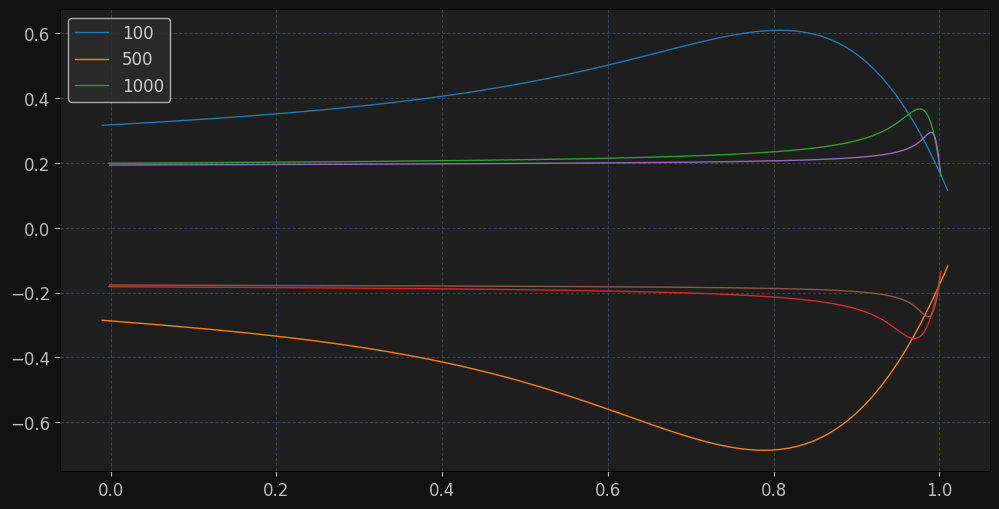

In [ ]:
U = omega * L
nxs =  [100, 500, 1000]
for nx in nxs:
    t, x_x, l_t_, D_xt_, u_xt_ = perform_numerical_computation(A, kappa, H, r, h0, nx)
    maximum_velocities = [max(u_xt_[x, len(l_t_) * 3 // 4:]) for x in range(u_xt_.shape[0])]

    print(u_xt_.shape)

    plt.plot(x_x, np.array(maximum_velocities) * U)


    minimum_velocities = [min(u_xt_[x, len(l_t_) * 3// 4:]) for x in range(u_xt_.shape[0])]

    plt.plot(x_x, np.array(minimum_velocities) * U)

plt.legend(nxs)
plt.show()

43177
9.424764613974373
9.42477796076938
57569
12.566280057944988
12.566370614359172
(1002, 91625)


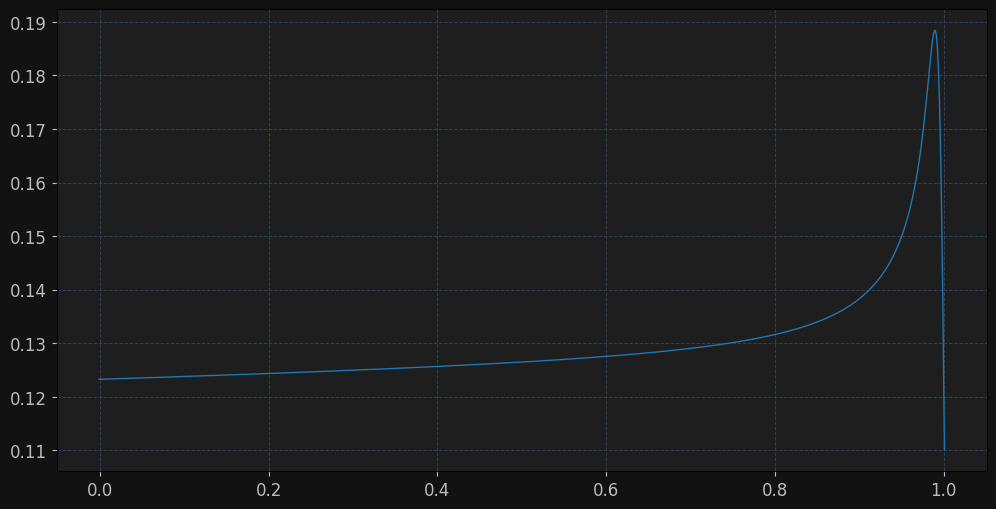

In [ ]:



t_idx_min = np.argmin(np.cos(t[40000:50000])) + 40000
print(t_idx_min)
t_min = t[t_idx_min]
print(t_min)
print(3 * np.pi)



t_idx_min2 = np.argmin(np.abs(t - 4 * np.pi))

print(t_idx_min2)
print(t[t_idx_min2])
print(4 * np.pi)


avg_velocities = [mean(u_xt_[x, t_idx_min:t_idx_min2]) for x in range(u_xt_.shape[0])]

print(u_xt_.shape)

plt.plot(x_x, np.array(avg_velocities) * U)





In [ ]:
R = omega * H

print(x_x.shape, l_t_.shape)
h_xt_ = x_x.reshape(len(x_x), 1) @ l_t_.reshape(len(l_t_), 1).T 
print(h_xt_.shape)
print(u_xt_.shape)


rho = 1000
tau_xt_ = rho * (u_xt_ * U) * (r * R) / (D_xt_ * H + h0 * H) * (D_xt_ * H + h0 * H)
tau_xt2 = rho * r * u_xt_ / (D_xt_ * H + h0 * H) * (U * omega) * (D_xt_ * H + h0 * H)




print(np.max(u_xt_ * U))
print(r * R)
print(np.max(D_xt_ * H + h_xt_ * H))

print(tau_xt_.shape)
print(sum(sum(np.abs(tau_xt_ - tau_xt2)))) # they are the same
# print(tau_xt2)



(1002,) (91625,)
(1002, 91625)
(1002, 91625)
2.8442352956346464
0.00040319999999999993
12.88817725210838
(1002, 91625)
4412139.044925677


43177
9.424764613974373
9.42477796076938
[1.87e+01 1.90e+01 1.93e+01 1.97e+01 2.00e+01 2.03e+01 2.06e+01 2.10e+01
 2.13e+01 2.16e+01 2.19e+01 2.23e+01 2.26e+01 2.29e+01 2.32e+01]


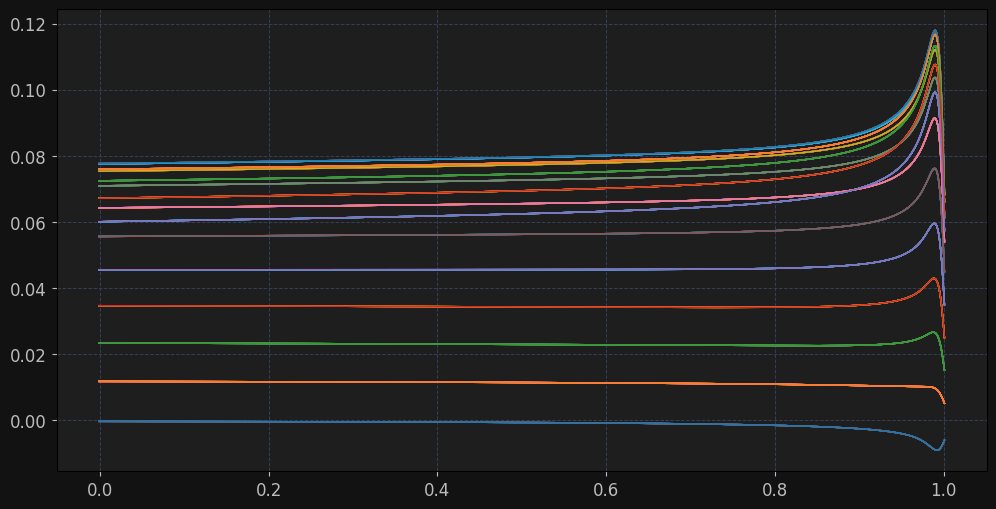

In [ ]:

n = 15

t_idx_min = np.argmin(np.cos(t[40000:50000])) + 40000
print(t_idx_min)
t_min = t[t_idx_min]
print(t_min)
print(3 * np.pi)

moments =  np.array(range(n)) * 750 + t_idx_min

for moment in moments:
    plt.plot(x_x, tau_xt_[:, moments])
# plt.legend(t[moments] / omega / 3600)
print(t[moments] / omega / 3600)
plt.show()


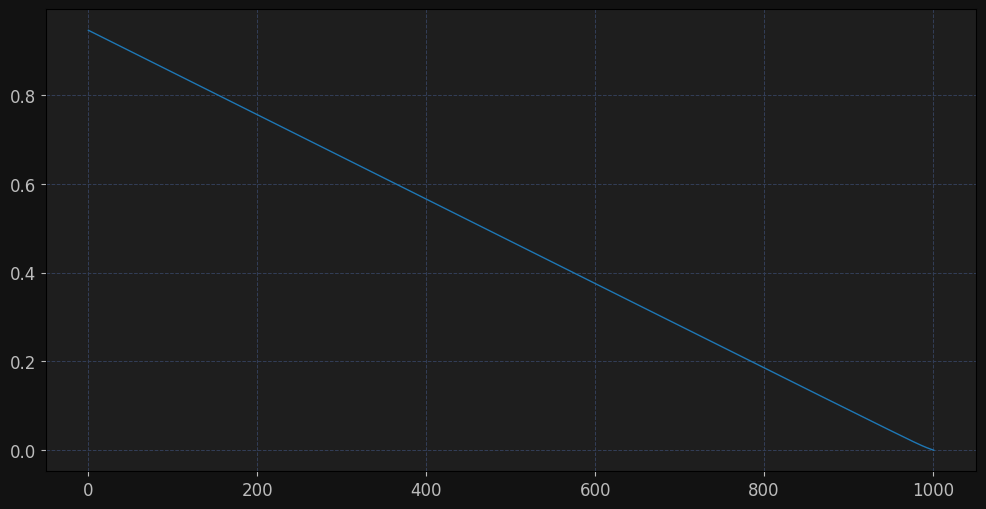

In [ ]:
plt.plot(D_xt_[:, 40000])
plt.show()